In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df= pd.read_csv("data.csv")


In [3]:
#choose columns

df_model = df[['Avg_Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','Salary_Per_Hour','Employer Provdid ','Jop_Estate','Same_Location','Company_Age','Python','Spark','Aws','Excel','Job Title_Simp','seniority']]


In [4]:
#dummy variables
df_dum = pd.get_dummies(df_model)

In [5]:
#train and test split
X = df_dum.drop('Avg_Salary', axis =1)
y = df_dum.Avg_Salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


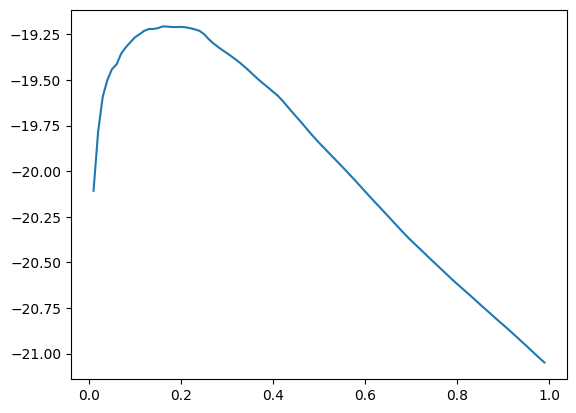

In [8]:
# lasso

alpha = []
error = []
#searching for best alpha
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

plt.plot(alpha,error)

In [9]:
# seraching for best alpha with min error
max_error=max(error)
max_index=error.index(max_error)
alpha_number=alpha[max_index]
print("Maximum error:", max_error)
print("alpha_number:", alpha_number)

Maximum error: -19.206720399806866
alpha_number: 0.16


In [10]:
# lasso regression
lm_l = Lasso(alpha=0.16)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.206720399806866

In [11]:
# random forest
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-15.021800613260744

In [12]:



# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}







In [13]:
#grid serche object
gs = GridSearchCV(rf,param_grid,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(max_features=None)

In [14]:
# predict lasso
predict_lml = lm_l.predict(X_test)
predict_lml

array([111.02043354,  74.43049809, 113.56580796, 127.2880765 ,
       151.11047381, 129.83851554, 136.72243437,  43.49605631,
        58.83151459,  92.34555019, 148.6650973 ,  79.36010892,
       116.45800335, 123.92134236,  64.148614  , 131.98168379,
        68.65932902,  74.86915892, 103.01158638,  87.52304022,
        98.05267574, 113.65923742, 151.14080669, 108.73245019,
       149.1493019 , 101.79656538,  75.9393048 , 130.40999714,
        92.46889777, 104.30329758,  82.47756406,  69.96036527,
       136.59470911, 102.03268901,  94.88693201,  96.24259432,
        80.68674562,  99.39254599,  89.99563805, 120.52710403,
       157.18747903, 115.65647253, 103.42993235, 106.34289178,
       156.60716589,  95.44312566, 144.19548043, 116.41037669,
       131.91095145, 103.16459832, 121.00179631, 111.10208834,
       102.92867355, 101.76093257,  87.23347962, 122.89418563,
       103.42993235,  78.72409311, 157.18747903, 133.00386245,
       117.05937323,  98.99534844, 125.18478873, 133.50

In [15]:
# predict random forest
predict_rf=gs.best_estimator_.predict(X_test)
predict_rf

array([110.085     ,  54.335     , 149.086     , 126.64375   ,
       152.86      , 126.715     , 152.155     ,  49.965     ,
        57.79      ,  63.175     , 159.46766667,  62.57      ,
       107.86333333, 117.82741667,  98.4365    , 139.13      ,
        58.255     ,  66.93      , 103.06625   ,  95.63333333,
       108.53      , 146.625     , 150.23      , 110.25      ,
       144.32125   , 108.385     ,  66.315     , 146.80333333,
       105.685     ,  99.175     ,  93.44      ,  55.075     ,
       122.855     , 105.33      , 100.9475    ,  93.325     ,
        88.43      , 110.97291667,  66.57      , 120.285     ,
       229.315     , 120.6       ,  88.38866667,  98.50412644,
       157.22      ,  80.33625   , 138.0375    , 119.29      ,
       130.625     , 102.36875   , 129.675     ,  79.405     ,
        73.98      , 103.515     ,  78.815     , 117.47      ,
        88.38866667,  68.85      , 229.315     , 141.75916667,
       119.915     ,  90.595     , 113.38      , 142.50

In [ ]:
# mean error for random forest
mean_absolute_error(y_test,predict_rf)


11.4482755744442

In [ ]:
# mean error for lasso
mean_absolute_error(y_test,predict_lml)


19.582344113148412

In [ ]:
# Calculate accuracy metrics for random forest
mse = mean_squared_error(y_test, predict_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predict_rf)
r2 = r2_score(y_test, predict_rf)

In [ ]:

# Print the accuracy metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 363.3214107783465
Root Mean Squared Error: 19.060991862396524
Mean Absolute Error: 11.4482755744442
R-squared: 0.7777186156373876


In [ ]:
# Calculate accuracy metrics for lasso
mse = mean_squared_error(y_test, predict_lml)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predict_lml)
r2 = r2_score(y_test, predict_lml)

In [ ]:
# Print the accuracy metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 645.1413707560674
Root Mean Squared Error: 25.399633279952436
Mean Absolute Error: 19.582344113148412
R-squared: 0.6053001206451369


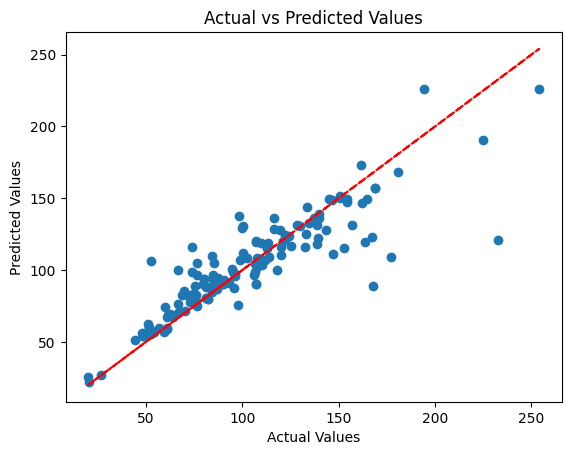

In [ ]:
# Create a scatter plot of predicted vs actual values for random forest model
plt.scatter(y_test, predict_rf)
plt.plot(y_test,y_test, 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

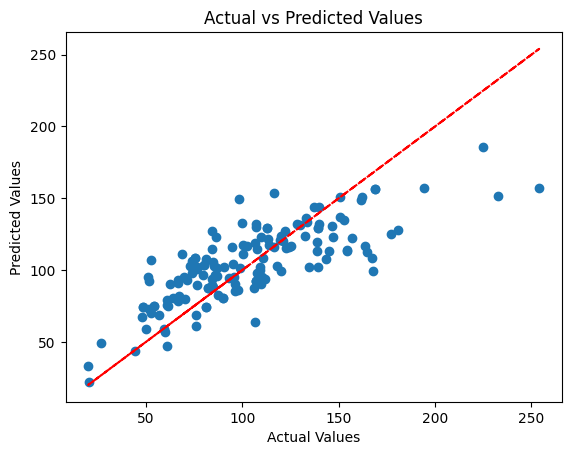

In [ ]:
# Create a scatter plot of predicted vs actual values for lasso model
plt.scatter(y_test, predict_lml)
plt.plot(y_test, y_test, 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()